In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Reshape, RNN, LSTM)
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
    for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [5]:
x = np.arange(0, 200, 0.5).reshape(-1, 1)
y = np.sin(x).reshape(-1, 1)

In [30]:
num_steps = 5
x_new, y_new = lstm_data_transform(y, y, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (395, 5, 1)


In [31]:
train_ind = int(0.8 * x.shape[0])
x_train = x_new[:train_ind]
y_train = y_new[:train_ind]
x_test = x_new[train_ind:]
y_test = y_new[train_ind:]

In [32]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(num_steps, 1), 
               return_sequences=False))
#model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, verbose=0)

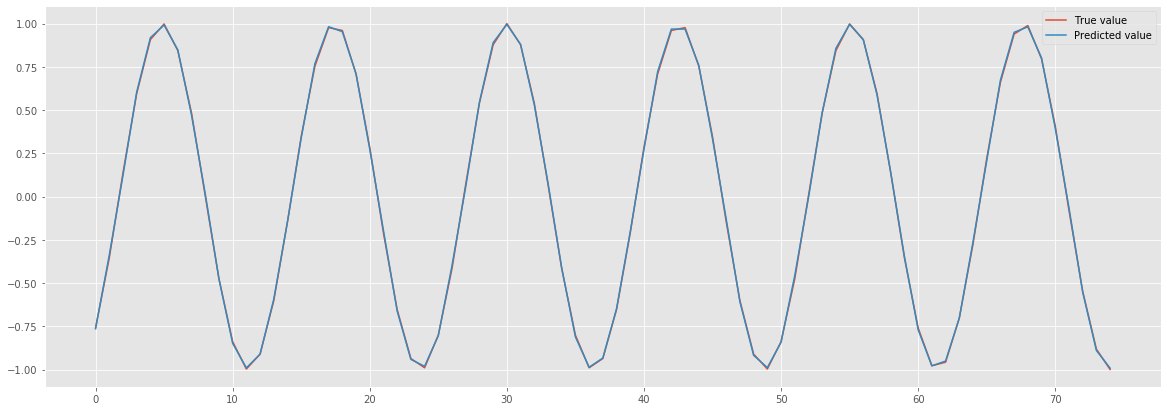

In [33]:
import matplotlib.pyplot as plt

test_predict = model.predict(x_test)
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(y_test, label="True value")
plt.plot(test_predict.ravel(), label="Predicted value")
plt.legend()